# Programme Digital du Mentorat - Article 1

Le programme digital du Mentorat permet à des jeunes étudiant-e-s d’être mis-e-s en relation avec des Mentors ( qui aboutit à un binôme ) afin de les accompagner dans la réussite de leurs études. Le processus de “matching” avec un mentor comprend plusieurs étapes du côté du jeune et se déroule via la plateforme dema1n.org et de l’emailing :

 Inscription du jeune sur la plateforme

 Activation du mail de validation de compte ( donc le jeune est apte à être matché )

 Réception d’une proposition de matching par mail ( mise en relation du jeune )

 Acceptation de la proposition de matching sur la plateforme par le jeune
 
Le travail demandé à travers ce lab est de pouvoir, parmi les critères ( colonnes) de notre dataset, évaluer le critère le plus important dans la réussite d'un matching. 

Pour ce faire, nous allons commencer par le pré-traitement des données à l'aide de la librairie pandas. Le pré-traitement des données est un processus qui sert principalement à vérifier et garantir la qualité des données ainsi de garantir une meilleure performance des algorithmes de prédiction. 

Le prétraitement des données implique plusieurs aspects, à savoir le nettoyage des données, l'intégration des données, la réduction de dimensionalité, etc.

Dans le présent Notebook, nous allons s'intéresser au nettoyage des données en identifiant les valeurs  manquantes et/ou valeurs aberrantes, ainsi d'essayer de les corriger.

Ensuite, nous allons s'intéresser à la corrélation entre les différents critères de notre dataset, afin de mieux comprendre l'impact de ces derniers à la réussite d'un matching. Et ce, en utilisant la matrice de corrélation à l'aide de la libraire Matplotlib et Seaborn.


## Data import

Tout d'abord, nous importons les données à l'aide de la bibliothèque pandas.

Grâce à la méthode `head(10)`, nous n'imprimons que les 10 premières lignes de l'ensemble de données.

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('extract.csv')
pd.set_option('display.max_columns', None)
data.head(10)

,b_id,b_score,b_statut,b_date_proposition,b_date_creation,b_delai_acceptation_minutes,b_etat_en_cours,b_date_maj_statut,b_raison_annulation,b_jour_dernier_cp,b_date_prochain_cp,b_appel_30j_fait,b_etat,b_date_maj_etat,b_duree_binome,b_duree_mois,j_id,j_academie,j_boursier,j_est_boursier,j_echelon_bourse,j_date_inscription,j_prenom,j_nom,j_email,j_est_mineur,j_telephone,j_precision,j_niveau_etude,j_departement_etude,j_nom_ecole,j_statut,j_date_maj_statut,j_rue,j_numero_rue,j_type,j_cursus,j_cursus_autre,j_region_etude,j_charte_jeune_valide,j_habitant_qpv,j_moyenne_notes,j_consentement_newsletter,j_secteur_1,j_secteur_2,j_filiere_1,j_filiere_2,j_besoin_1,j_besoins,j_besoin_postuler_present,j_besoin_decouvrir_present,j_besoin_performer_present,j_besoin_motiver_present,j_besoin_anglais_present,j_genre,j_memo_lu,j_profil_linkedin,j_nom_diplome,j_video_vue,j_connu_par,j_mono_besoin,j_binome_regional_souhaite,j_disponibilites,j_date_de_naissance,j_age,j_age_inscription,j_filiere_bac,j_mention_bac,j_projection_etude,j_objectifs_annuels,j_frequence_echanges_souhaitee,j_programme,j_habitant_zrr,j_appel_validation_fait,j_bam_fait,j_etudiant_etranger,j_ase,j_passions,j_date_inscription_bam,j_date_prevue_bam,j_date_participation_bam,j_date_premier_contact,j_date_prevue_appel,j_date_appel,j_resultat_appel,j_etat,j_date_maj_etat,j_raison_non_dispo,j_consentement_enquete_injep,j_date_statut_apte,j_ville_etude,j_code_postal_etude,j_nom_ecole_court,j_url,j_nb_besoins,j_nb_passions,j_code_postal,j_ville,j_score_satisfaction,j_nb_evenements_present,j_connect_is_natual,j_connect_source,j_connect_source_thematic,j_connect_source_medium,j_connect_source_extra,j_disponibilites_2,j_lycee_bac_departement,j_lycee_bac,j_mail_activation_renvoye,j_sms_activation_envoye,j_admin_associe_id
0,106696,0.0,TERMINE,7/6/2023 12:42:00,10/11/2022 2:00:00,-386562,0,10/12/2023 11:44:08,NaN,360,4/3/2024 2:00:00,NaN,NaN,NaN,366,12,132339,PARIS,OUI,1,1,1/15/2022 1:00:00,eLW1VY8sg958bjmG7HuUi30qlzNgxayLWHD03XArj6g=,xk2IqbUCL4eGKI9/HIfNU3NqOJSJAAYT4AbpZYzDF7o=,ymuwiUlaFIehJCJXRq0a06VMt3ewAZwJ2Y6deZo5Mr0=,0,Xn6UJZK/lm1Odk1XEHffd/NEuz7l3pFXUAVkCROkRLw=,Je souhaite intégrer ce programme car il me pe...,Bac+2,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,J4kJ+hqY9PNQ0Nhyj84X112nfuCBiCTqclgEQK4vQck=,NON DISPONIBLE,10/12/2023 11:44:08,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,ETUDIANT_LICENCE,CPGE,NaN,Île-de-France,1,0.0,Non renseigné,1.0,Je ne sais pas,Je ne sais pas,NOT FOUND,NaN,postuler,"postuler,performer,motiver",1,0,1,1,0,Féminin,1,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,L1 CPGE PCSI,1,Via mon établissement scolaire,0,0,Non renseigné,WxWaIbGWqXaU4GMDGmh4wHtFSc9dgz4i3+NhMRfMMiY=,20.0,19.0,Général,Assez bien,Bac+5,Non renseigné,Non renseigné,EL,NaN,1.0,1.0,0,0,NaN,NaN,NaN,5/2/2022 0:00:00,NaN,NaN,NaN,Positif,Autonome,NaN,TEMPORAIRE,NaN,NaN,NaN,NaN,NaN,https://www.dema1n.org/bo/jeunes/132339,3,NaN,EVmb6ZSL4/SBA72BIijgZv6mU3EEHkqdx/8HHhOwqkI=,XdJytPMWt3anuOPQiUs34eQr49XTsgS4pYNsxQWXprE=,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79826,8.0,TERMINE,12/30/2022 16:07:18,12/30/2022 22:32:09,384,0,3/1/2023 17:11:50,NaN,30,NaN,NaN,NaN,NaN,61,3,97881,CAEN,NON,0,NaN,12/11/2022 8:31:42,hDWsT62o0FBjQR8Iiw9m7qZbxHbmoxTqLPCAj/YOeFk=,47DEQpj8HBSa+/TImW+5JCeuQeRkm5NMpJWZG3hSuFU=,Rl13CeGfi8h5oVdyLH8ToA/26Lt/NyFE0ZUQ7zNogTw=,0,47DEQpj8HBSa+/TImW+5JCeuQeRkm5NMpJWZG3hSuFU=,Je suis étudiant dans le cadre du programme Er...,Bac+5 et plus,OG7OYAEBbLNa29q5b+OD0TTs/+QkrXlNGhz5D7QUhFQ=,SVwrYAllwn/Uki5H4HSkO6/6nKGV0Mvtl2DUw1/Bf7c=,SORTI,3/1/2023 17:11:50,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,ETUDIANT_MASTER,Master,NaN,Normandie,1,0.0,14 et 20,0.0,"BTP, Bâtiment, Génie civil",Architecture-urbanisme,"Batiment, Travaux publics",NaN,postuler,"postuler,decouvrir",1,1,0,0,0,Masculin,0,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,Non renseigné,1,Réseaux sociaux,0,0,Non renseigné,tVqvAoEFA/ph3Zopz

## Analyse Exploratoire des données


In [4]:
#énumération des colonnes
data.columns

Index(['b_id', 'b_score', 'b_statut', 'b_date_proposition', 'b_date_creation',
       'b_delai_acceptation_minutes', 'b_etat_en_cours', 'b_date_maj_statut',
       'b_raison_annulation', 'b_jour_dernier_cp',
       ...
       'j_connect_source', 'j_connect_source_thematic',
       'j_connect_source_medium', 'j_connect_source_extra',
       'j_disponibilites_2', 'j_lycee_bac_departement', 'j_lycee_bac',
       'j_mail_activation_renvoye', 'j_sms_activation_envoye',
       'j_admin_associe_id'],
      dtype='object', length=111)

In [5]:
#type et info de chaque colonne
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 111 entries, b_id to j_admin_associe_id
dtypes: float64(22), int64(22), object(67)
memory usage: 867.3+ KB


In [6]:
#description statistique des colonnes( uniquement les valeurs numériques)
data.describe()

,b_id,b_score,b_delai_acceptation_minutes,b_etat_en_cours,b_jour_dernier_cp,b_appel_30j_fait,b_etat,b_duree_binome,b_duree_mois,j_id,j_est_boursier,j_est_mineur,j_charte_jeune_valide,j_habitant_qpv,j_consentement_newsletter,j_filiere_2,j_besoin_postuler_present,j_besoin_decouvrir_present,j_besoin_performer_present,j_besoin_motiver_present,j_besoin_anglais_present,j_memo_lu,j_video_vue,j_mono_besoin,j_binome_regional_souhaite,j_age,j_age_inscription,j_habitant_zrr,j_appel_validation_fait,j_bam_fait,j_etudiant_etranger,j_ase,j_consentement_enquete_injep,j_nb_besoins,j_nb_passions,j_score_satisfaction,j_nb_evenements_present,j_connect_source,j_connect_source_thematic,j_connect_source_medium,j_connect_source_extra,j_mail_activation_renvoye,j_sms_activation_envoye,j_admin_associe_id
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,5.0,0.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,712.000000,997.000000,0.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.00000,1000.000000,1000.000000,1000.0,924.000000,924.000000,981.000000,81.000000,81.000000,1000.000000,1000.000000,0.0,1000.000000,648.000000,32.000000,29.000000,0.0,0.0,0.0,0.0,0.0,0.0,11.000000
mean,71096.961000,5.734000,-11239.27000,0.008000,76.770000,1.0,NaN,101.331000,3.373000,85803.653000,0.340000,0.015000,0.994000,0.151685,0.498495,NaN,0.696000,0.430000,0.475000,0.467000,0.0,0.19300,0.826000,0.244000,0.0,22.383117,21.357143,0.078491,0.567901,0.543210,0.227000,0.005000,NaN,2.358000,4.189815,4.437500,1.034483,NaN,NaN,NaN,NaN,NaN,NaN,76709.272727
std,7912.757772,2.993694,81674.67444,0.089129,82.484063,0.0,NaN,91.890616,3.036625,16755.926554,0.473946,0.121613,0.077266,0.358968,0.500249,NaN,0.460213,0.495323,0.499624,0.499159,0.0,0.39485,0.379299,0.429708,0.0,6.088938,6.087849,0.269080,0.498454,0.501233,0.419102,0.070569,NaN,0.850034,1.323695,1.134147,1.238742,NaN,NaN,NaN,NaN,NaN,NaN,38944.700220
min,56586.000000,0.000000,-746553.00000,0.000000,0.000000,1.0,NaN,0.000000,0.000000,296.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,17.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,27598.000000
25%,65369.000000,4.000000,5.00000,0.000000,30.000000,1.0,NaN,35.000000,1.000000,80207.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,1.000000,0.000000,0.0,20.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,4.000000,4.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,33071.000000
50%,71834.500000,6.000000,40.50000,0.000000,30.000000,1.0,NaN,79.000000,3.000000,88895.500000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.0,0.00000,1.000000,0.000000,0.0,21.500000,20.000000,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,3.000000,5.000000,5.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,85226.000000
75%,75558.500000,8.000000,270.00000,0.000000,90.000000,1.0,NaN,146.000000,5.000000,93920.500000,1.000000,0.000000,1.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.0,0.00000,1.000000,0.000000,0.0,24.000000,23.000000,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,3.000000,5.000000,5.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,118032.500000
max,106941.000000,15.000000,2867.00000,1.000000,540.000000,1.0,NaN,582.000000,19.000000,132993.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.0,1.00000,1.000000,1.000000,0.0,134.000000,133.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,5.000000,5.000000,5.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,118044.000000


Nous remarquons que l'âge maximal des mentorés est de 134 ans, dont il s'agit certainement d'un outlier (valeur aberrante).

Ainsi le programme 1 jeune 1 mentor est spécialement dédié aux jeunes moins de 30 ans. Nous allons créer un nouveau DataFrame 'data' des jeunes ayant moins de 30 ans.

In [7]:
df = data[(data['j_age']< 30)]
df['j_age'].describe()


count    899.000000
mean      21.822024
std        2.355282
min       17.000000
25%       20.000000
50%       21.000000
75%       23.000000
max       29.000000
Name: j_age, dtype: float64

In [8]:
#dimensions du nouveau dataframe
df.shape

(899, 111)

## Pré-traitement des données

Vérifions si notre dataset contient des doublons.

In [9]:
df.duplicated().sum()

0

Maintenant, identifions les valeurs nulles / manquntes.

In [10]:
df.isna().sum()

b_id                           0
b_score                        0
b_statut                       0
b_date_proposition             0
b_date_creation                0
                            ... 
j_lycee_bac_departement      895
j_lycee_bac                  896
j_mail_activation_renvoye    899
j_sms_activation_envoye      899
j_admin_associe_id           888
Length: 111, dtype: int64

Afin d'avoir une meilleur visibilté des valeurs manquantes, il est préférable d'identifier uniquement les colonnes qui contiennent des valeurs nulles,NaN.

In [11]:
column_with_nan = df.columns[df.isnull().any()]
print(column_with_nan)

Index(['b_raison_annulation', 'b_date_prochain_cp', 'b_appel_30j_fait',
       'b_etat', 'b_date_maj_etat', 'j_academie', 'j_echelon_bourse',
       'j_precision', 'j_cursus_autre', 'j_habitant_qpv', 'j_secteur_1',
       'j_secteur_2', 'j_filiere_1', 'j_filiere_2', 'j_connu_par',
       'j_habitant_zrr', 'j_appel_validation_fait', 'j_bam_fait', 'j_passions',
       'j_date_inscription_bam', 'j_date_prevue_bam',
       'j_date_participation_bam', 'j_date_premier_contact',
       'j_date_prevue_appel', 'j_date_appel', 'j_resultat_appel',
       'j_date_maj_etat', 'j_raison_non_dispo', 'j_consentement_enquete_injep',
       'j_date_statut_apte', 'j_ville_etude', 'j_code_postal_etude',
       'j_nom_ecole_court', 'j_nb_passions', 'j_score_satisfaction',
       'j_nb_evenements_present', 'j_connect_is_natual', 'j_connect_source',
       'j_connect_source_thematic', 'j_connect_source_medium',
       'j_connect_source_extra', 'j_disponibilites_2',
       'j_lycee_bac_departement', 'j_lycee_b

Vérifions, maintement, le nombre des valeurs manquantes à l'aide de la fonction `sum` et les boucles For. 

In [12]:
for column in column_with_nan:
    print(column, df[column].isnull().sum())

b_raison_annulation 614
b_date_prochain_cp 863
b_appel_30j_fait 897
b_etat 899
b_date_maj_etat 892
j_academie 6
j_echelon_bourse 588
j_precision 269
j_cursus_autre 809
j_habitant_qpv 247
j_secteur_1 1
j_secteur_2 171
j_filiere_1 5
j_filiere_2 899
j_connu_par 10
j_habitant_zrr 19
j_appel_validation_fait 820
j_bam_fait 820
j_passions 292
j_date_inscription_bam 877
j_date_prevue_bam 877
j_date_participation_bam 857
j_date_premier_contact 866
j_date_prevue_appel 878
j_date_appel 876
j_resultat_appel 851
j_date_maj_etat 898
j_raison_non_dispo 766
j_consentement_enquete_injep 899
j_date_statut_apte 19
j_ville_etude 265
j_code_postal_etude 263
j_nom_ecole_court 263
j_nb_passions 274
j_score_satisfaction 871
j_nb_evenements_present 874
j_connect_is_natual 842
j_connect_source 899
j_connect_source_thematic 899
j_connect_source_medium 899
j_connect_source_extra 899
j_disponibilites_2 893
j_lycee_bac_departement 895
j_lycee_bac 896
j_mail_activation_renvoye 899
j_sms_activation_envoye 899
j_admin

Il est vrai qu'un nombre important des raisons d'annulations est manquant. En revanche, on ne peut pas les supprimer vu quu'elles sont pertinentes pour la compréhension du cas pratique ainsi que pour des raisons d'historisation. Nous décidons de les garder.

In [13]:
print(df['b_raison_annulation'])

0                                                  NaN
1                                                  NaN
2      Mauvais timing / Accompagnement plus nécessaire
4                                 Pas de réponse jeune
5                                                  NaN
                            ...                       
994                                                NaN
995                             Indisponibilité mentor
996                                                NaN
997                             Indisponibilité mentor
998           Autre : Jeune insolente avec sa mentore 
Name: b_raison_annulation, Length: 899, dtype: object


En ce qui concerne les autres colonnes, nous ne gardons que les colonnes où il y a au moins 30 % de valeurs non nulles. Pour ce faire, nous allons utiliser la fonction `thresh`. Ainsi, nous avons choisis le pourcentage 30% afin de conserver les deux colonnes b_raison_annulation et j_echelon bourse

In [14]:
pd.options.mode.chained_assignment = None
df.dropna(thresh=0.3*len(df), axis=1, inplace=True)
df.shape

(899, 80)

Nous constatons que la dimension du dataset a changé. Les 31 colonnes qui contiennent des valeurs nulles ont été supprimées.

Vérifions, maintenant, les colonnes restantes.

In [15]:
column_with_nan = df.columns[df.isnull().any()]
print(column_with_nan)

for column in column_with_nan:
    print(column, df[column].isnull().sum())

Index(['b_raison_annulation', 'j_academie', 'j_echelon_bourse', 'j_precision',
       'j_habitant_qpv', 'j_secteur_1', 'j_secteur_2', 'j_filiere_1',
       'j_connu_par', 'j_habitant_zrr', 'j_passions', 'j_date_statut_apte',
       'j_ville_etude', 'j_code_postal_etude', 'j_nom_ecole_court',
       'j_nb_passions'],
      dtype='object')
b_raison_annulation 614
j_academie 6
j_echelon_bourse 588
j_precision 269
j_habitant_qpv 247
j_secteur_1 1
j_secteur_2 171
j_filiere_1 5
j_connu_par 10
j_habitant_zrr 19
j_passions 292
j_date_statut_apte 19
j_ville_etude 265
j_code_postal_etude 263
j_nom_ecole_court 263
j_nb_passions 274


Nous observons 588 valeurs manquantes dans la colonne j_echelon_bourse. De ce fait, nous allons les remplacer en fonction des valeurs binaires 0 ou 1 dans la colonne 'j_est_boursier'. Analysons les valeurs des deux colonnes 'j_est_boursier' et 'j_echelon_bourse'.

In [16]:
df[(df['j_est_boursier'] == 0) & (df['j_echelon_bourse'].isnull())]


,b_id,b_score,b_statut,b_date_proposition,b_date_creation,b_delai_acceptation_minutes,b_etat_en_cours,b_date_maj_statut,b_raison_annulation,b_jour_dernier_cp,b_duree_binome,b_duree_mois,j_id,j_academie,j_boursier,j_est_boursier,j_echelon_bourse,j_date_inscription,j_prenom,j_nom,j_email,j_est_mineur,j_telephone,j_precision,j_niveau_etude,j_departement_etude,j_nom_ecole,j_statut,j_date_maj_statut,j_rue,j_numero_rue,j_type,j_cursus,j_region_etude,j_charte_jeune_valide,j_habitant_qpv,j_moyenne_notes,j_consentement_newsletter,j_secteur_1,j_secteur_2,j_filiere_1,j_besoin_1,j_besoins,j_besoin_postuler_present,j_besoin_decouvrir_present,j_besoin_performer_present,j_besoin_motiver_present,j_besoin_anglais_present,j_genre,j_memo_lu,j_profil_linkedin,j_nom_diplome,j_video_vue,j_connu_par,j_mono_besoin,j_binome_regional_souhaite,j_disponibilites,j_date_de_naissance,j_age,j_age_inscription,j_filiere_bac,j_mention_bac,j_projection_etude,j_objectifs_annuels,j_frequence_echanges_souhaitee,j_programme,j_habitant_zrr,j_etudiant_etranger,j_ase,j_passions,j_etat,j_date_statut_apte,j_ville_etude,j_code_postal_etude,j_nom_ecole_court,j_url,j_nb_besoins,j_nb_passions,j_code_postal,j_ville
1,79826,8.0,TERMINE,12/30/2022 16:07:18,12/30/2022 22:32:09,384,0,3/1/2023 17:11:50,NaN,30,61,3,97881,CAEN,NON,0,NaN,12/11/2022 8:31:42,hDWsT62o0FBjQR8Iiw9m7qZbxHbmoxTqLPCAj/YOeFk=,47DEQpj8HBSa+/TImW+5JCeuQeRkm5NMpJWZG3hSuFU=,Rl13CeGfi8h5oVdyLH8ToA/26Lt/NyFE0ZUQ7zNogTw=,0,47DEQpj8HBSa+/TImW+5JCeuQeRkm5NMpJWZG3hSuFU=,Je suis étudiant dans le cadre du programme Er...,Bac+5 et plus,OG7OYAEBbLNa29q5b+OD0TTs/+QkrXlNGhz5D7QUhFQ=,SVwrYAllwn/Uki5H4HSkO6/6nKGV0Mvtl2DUw1/Bf7c=,SORTI,3/1/2023 17:11:50,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,ETUDIANT_MASTER,Master,Normandie,1,0.0,14 et 20,0.0,"BTP, Bâtiment, Génie civil",Architecture-urbanisme,"Batiment, Travaux publics",postuler,"postuler,decouvrir",1,1,0,0,0,Masculin,0,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,Non renseigné,1,Réseaux sociaux,0,0,Non renseigné,tVqvAoEFA/ph3ZopzWWN0zGzFQ76PLScW8AuDlBnWEI=,25.0,24.0,Général,Assez bien,Au delà,"Obtenir un diplôme (licence, master, BTS, DUT..)",Non renseigné,PP,0.0,1,0,"art,creation,cuisiner,jeux",Autonome,12/11/2022,2mzjdkfAfJTUT+Ko6H1fI6fwut85G+LQAcEg3ltd1mw=,uyJ1ZrMBDGrwR6hB9lbvRhZ1luYjSvqnxx6P2IxVJu4=,X9VKJkpU0zRbKbrinb+/ANmAKr8Ghw3MRFmxumCILik=,https://www.dema1n.org/bo/jeunes/97881,2,4.0,uyJ1ZrMBDGrwR6hB9lbvRhZ1luYjSvqnxx6P2IxVJu4=,NNC1G8s26ap1Ue89UXOEH+Og3u/A3/70MAawZoDTQM0=
2,63211,8.0,ANNULE,10/17/2022 12:17:43,10/17/2022 12:18:27,0,0,12/9/2022 15:03:57,Mauvais timing / Accompagnement plus nécessaire,30,53,2,79738,TOULOUSE,NON,0,NaN,10/14/2022 11:28:44,bOVjpZdcb4/h0obBujOkqlk437DzyCQ4wmB66enOqNo=,PObKf6lYXCJu/Cgl3mS39UazSvDZS1ymYExio8FPlSQ=,t8HP4pE8dTSa0F1i+GbW1f+axZAv8pl7/83I4GB7TFU=,0,X/qfY9O8fXQrDT1oMRzbBvHMFRg0bzO9Hq93d2Tl9Zk=,GJZ : Marwan vient de valider un BTS et veut f...,Bac+3,sTht7fecAeQ/MqhntPCVd1GTyFwHZdO+O4eeRwxzhoY=,emqGzn28rVvSeOMZZZo0YcBFEz40p1qF3Bllbg+fw1o=,NON DISPONIBLE,12/9/2022 15:03:57,KLG+bNaXFisidrPfHyiJUNp1dvK24he1FcCdqa79kRg=,SyJ3d9TdH8Ycb4hPSGQdArTRIdP9Moywi1Ux/Kzav4o=,ETUDIANT_MASTER,Ecole Post-bac,Occitanie,1,NaN,12 et 14,0.0,Banque-Finance,"Commerce, distribution","Banque, Assurance et Finance",postuler,postuler,1,0,0,0,0,Masculin,0,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,Bachelor Conseiller Financier,0,Recherche Google,1,0,Non renseigné,+1AXcvbh1gdWkOB6HeXyh3QcsIlGyVdMmWqlWLiCc2g=,22.0,21.0,Général,Passable (ou pas de mention),Bac+5,"Trouver un stage, une alternance, un emploi",Plus d'une fois par semaine,PNP,0.0,0,0,"basket,foot",Autonome,10/14/2022,VIPV35skXmYsDkNouAYuig/STBfOTe0aDkUuTuh53YE=,R4fhmY6gBodApNQ8yoPIT6YjO7xm0SuNRCzageRudbo=,jQOOX3gh4jwEy95DxNgEm+EP5ps5Ff6xefk5IqN9Mv0=,https://www.dema1n.org/bo/jeunes/79738,1,2.0,uKf2fgBVggJzTRG/uKPa513rTX2m7GdQSBxo/W4Lpgg=,5ltzAfoUt0K5u5RDG0ORHPMLQypn5W1MoLL73FjWN9U=
5,63029,9.0,TERMINE,10/17/2022 9:45:43,10/17/2022 9:59:37,13,0,4/6/20

Observons le résultat de la ligne ayant l'indexe 2.

In [17]:
df[(df['j_est_boursier'] == 0) & (df['j_echelon_bourse'].isnull())]
df['j_echelon_bourse'].fillna(0, inplace=True)
df.iloc[[2]]

,b_id,b_score,b_statut,b_date_proposition,b_date_creation,b_delai_acceptation_minutes,b_etat_en_cours,b_date_maj_statut,b_raison_annulation,b_jour_dernier_cp,b_duree_binome,b_duree_mois,j_id,j_academie,j_boursier,j_est_boursier,j_echelon_bourse,j_date_inscription,j_prenom,j_nom,j_email,j_est_mineur,j_telephone,j_precision,j_niveau_etude,j_departement_etude,j_nom_ecole,j_statut,j_date_maj_statut,j_rue,j_numero_rue,j_type,j_cursus,j_region_etude,j_charte_jeune_valide,j_habitant_qpv,j_moyenne_notes,j_consentement_newsletter,j_secteur_1,j_secteur_2,j_filiere_1,j_besoin_1,j_besoins,j_besoin_postuler_present,j_besoin_decouvrir_present,j_besoin_performer_present,j_besoin_motiver_present,j_besoin_anglais_present,j_genre,j_memo_lu,j_profil_linkedin,j_nom_diplome,j_video_vue,j_connu_par,j_mono_besoin,j_binome_regional_souhaite,j_disponibilites,j_date_de_naissance,j_age,j_age_inscription,j_filiere_bac,j_mention_bac,j_projection_etude,j_objectifs_annuels,j_frequence_echanges_souhaitee,j_programme,j_habitant_zrr,j_etudiant_etranger,j_ase,j_passions,j_etat,j_date_statut_apte,j_ville_etude,j_code_postal_etude,j_nom_ecole_court,j_url,j_nb_besoins,j_nb_passions,j_code_postal,j_ville
2,63211,8.0,ANNULE,10/17/2022 12:17:43,10/17/2022 12:18:27,0,0,12/9/2022 15:03:57,Mauvais timing / Accompagnement plus nécessaire,30,53,2,79738,TOULOUSE,NON,0,0,10/14/2022 11:28:44,bOVjpZdcb4/h0obBujOkqlk437DzyCQ4wmB66enOqNo=,PObKf6lYXCJu/Cgl3mS39UazSvDZS1ymYExio8FPlSQ=,t8HP4pE8dTSa0F1i+GbW1f+axZAv8pl7/83I4GB7TFU=,0,X/qfY9O8fXQrDT1oMRzbBvHMFRg0bzO9Hq93d2Tl9Zk=,GJZ : Marwan vient de valider un BTS et veut f...,Bac+3,sTht7fecAeQ/MqhntPCVd1GTyFwHZdO+O4eeRwxzhoY=,emqGzn28rVvSeOMZZZo0YcBFEz40p1qF3Bllbg+fw1o=,NON DISPONIBLE,12/9/2022 15:03:57,KLG+bNaXFisidrPfHyiJUNp1dvK24he1FcCdqa79kRg=,SyJ3d9TdH8Ycb4hPSGQdArTRIdP9Moywi1Ux/Kzav4o=,ETUDIANT_MASTER,Ecole Post-bac,Occitanie,1,NaN,12 et 14,0.0,Banque-Finance,"Commerce, distribution","Banque, Assurance et Finance",postuler,postuler,1,0,0,0,0,Masculin,0,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,Bachelor Conseiller Financier,0,Recherche Google,1,0,Non renseigné,+1AXcvbh1gdWkOB6HeXyh3QcsIlGyVdMmWqlWLiCc2g=,22.0,21.0,Général,Passable (ou pas de mention),Bac+5,"Trouver un stage, une alternance, un emploi",Plus d'une fois par semaine,PNP,0.0,0,0,"basket,foot",Autonome,10/14/2022,VIPV35skXmYsDkNouAYuig/STBfOTe0aDkUuTuh53YE=,R4fhmY6gBodApNQ8yoPIT6YjO7xm0SuNRCzageRudbo=,jQOOX3gh4jwEy95DxNgEm+EP5ps5Ff6xefk5IqN9Mv0=,https://www.dema1n.org/bo/jeunes/79738,1,2.0,uKf2fgBVggJzTRG/uKPa513rTX2m7GdQSBxo/W4Lpgg=,5ltzAfoUt0K5u5RDG0ORHPMLQypn5W1MoLL73FjWN9U=


Continuons dans notre analyse. 

Nous allons conserver les trois colonnes suivantes: j_ville_etude, j_code_postal_etude et j_nom_ecole_court vu le nombre faible des valeurs manquantes. Sans oublier que ces dernières sont cryptées, ce qui fait qu'aucun traitement ne peut être fait dans le cadre de notre étude de cas.
 

In [18]:
print(df['j_nom_ecole_court'])

0                                               NaN
1      X9VKJkpU0zRbKbrinb+/ANmAKr8Ghw3MRFmxumCILik=
2      jQOOX3gh4jwEy95DxNgEm+EP5ps5Ff6xefk5IqN9Mv0=
4      O1NRgsyLnI0Q6vCye0CnUiozdqVepWFHpU4CYPbIIxg=
5      y/2D8wynOf209GeLnH8QE/W+5EhCufpDQXC4g8ZH7jg=
                           ...                     
994                                             NaN
995    w5Aj3j7AW+7zhfD+ZLHDSjELWMmnqFf+in8dNTADYEw=
996                                             NaN
997    wc73R3RXNjeuUon9Ow/zYLKha63Vt21lYy4ZR1Rl3F0=
998    4M+/llbF4akvSa637Jg/MLUTbS3sLk11le7mTBJ4v0M=
Name: j_nom_ecole_court, Length: 899, dtype: object


Pour la colonne 'j_precision', nous allons remplacer les valeurs manquantes, dont le jeune n'a pas renseigné des précisions sur son parcours, par le string 'Pas de réponse jeune' afin de minimiser les valeurs nulles.

Et ce, en utilisant la fonction `fillna`.

In [19]:
df['j_precision'].fillna('Pas de réponse jeune', inplace=True)
df.head()

,b_id,b_score,b_statut,b_date_proposition,b_date_creation,b_delai_acceptation_minutes,b_etat_en_cours,b_date_maj_statut,b_raison_annulation,b_jour_dernier_cp,b_duree_binome,b_duree_mois,j_id,j_academie,j_boursier,j_est_boursier,j_echelon_bourse,j_date_inscription,j_prenom,j_nom,j_email,j_est_mineur,j_telephone,j_precision,j_niveau_etude,j_departement_etude,j_nom_ecole,j_statut,j_date_maj_statut,j_rue,j_numero_rue,j_type,j_cursus,j_region_etude,j_charte_jeune_valide,j_habitant_qpv,j_moyenne_notes,j_consentement_newsletter,j_secteur_1,j_secteur_2,j_filiere_1,j_besoin_1,j_besoins,j_besoin_postuler_present,j_besoin_decouvrir_present,j_besoin_performer_present,j_besoin_motiver_present,j_besoin_anglais_present,j_genre,j_memo_lu,j_profil_linkedin,j_nom_diplome,j_video_vue,j_connu_par,j_mono_besoin,j_binome_regional_souhaite,j_disponibilites,j_date_de_naissance,j_age,j_age_inscription,j_filiere_bac,j_mention_bac,j_projection_etude,j_objectifs_annuels,j_frequence_echanges_souhaitee,j_programme,j_habitant_zrr,j_etudiant_etranger,j_ase,j_passions,j_etat,j_date_statut_apte,j_ville_etude,j_code_postal_etude,j_nom_ecole_court,j_url,j_nb_besoins,j_nb_passions,j_code_postal,j_ville
0,106696,0.0,TERMINE,7/6/2023 12:42:00,10/11/2022 2:00:00,-386562,0,10/12/2023 11:44:08,NaN,360,366,12,132339,PARIS,OUI,1,1,1/15/2022 1:00:00,eLW1VY8sg958bjmG7HuUi30qlzNgxayLWHD03XArj6g=,xk2IqbUCL4eGKI9/HIfNU3NqOJSJAAYT4AbpZYzDF7o=,ymuwiUlaFIehJCJXRq0a06VMt3ewAZwJ2Y6deZo5Mr0=,0,Xn6UJZK/lm1Odk1XEHffd/NEuz7l3pFXUAVkCROkRLw=,Je souhaite intégrer ce programme car il me pe...,Bac+2,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,J4kJ+hqY9PNQ0Nhyj84X112nfuCBiCTqclgEQK4vQck=,NON DISPONIBLE,10/12/2023 11:44:08,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,ETUDIANT_LICENCE,CPGE,Île-de-France,1,0.0,Non renseigné,1.0,Je ne sais pas,Je ne sais pas,NOT FOUND,postuler,"postuler,performer,motiver",1,0,1,1,0,Féminin,1,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,L1 CPGE PCSI,1,Via mon établissement scolaire,0,0,Non renseigné,WxWaIbGWqXaU4GMDGmh4wHtFSc9dgz4i3+NhMRfMMiY=,20.0,19.0,Général,Assez bien,Bac+5,Non renseigné,Non renseigné,EL,NaN,0,0,NaN,Autonome,NaN,NaN,NaN,NaN,https://www.dema1n.org/bo/jeunes/132339,3,NaN,EVmb6ZSL4/SBA72BIijgZv6mU3EEHkqdx/8HHhOwqkI=,XdJytPMWt3anuOPQiUs34eQr49XTsgS4pYNsxQWXprE=
1,79826,8.0,TERMINE,12/30/2022 16:07:18,12/30/2022 22:32:09,384,0,3/1/2023 17:11:50,NaN,30,61,3,97881,CAEN,NON,0,0,12/11/2022 8:31:42,hDWsT62o0FBjQR8Iiw9m7qZbxHbmoxTqLPCAj/YOeFk=,47DEQpj8HBSa+/TImW+5JCeuQeRkm5NMpJWZG3hSuFU=,Rl13CeGfi8h5oVdyLH8ToA/26Lt/NyFE0ZUQ7zNogTw=,0,47DEQpj8HBSa+/TImW+5JCeuQeRkm5NMpJWZG3hSuFU=,Je suis étudiant dans le cadre du programme Er...,Bac+5 et plus,OG7OYAEBbLNa29q5b+OD0TTs/+QkrXlNGhz5D7QUhFQ=,SVwrYAllwn/Uki5H4HSkO6/6nKGV0Mvtl2DUw1/Bf7c=,SORTI,3/1/2023 17:11:50,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,ETUDIANT_MASTER,Master,Normandie,1,0.0,14 et 20,0.0,"BTP, Bâtiment, Génie civil",Architecture-urbanisme,"Batiment, Travaux publics",postuler,"postuler,decouvrir",1,1,0,0,0,Masculin,0,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,Non renseigné,1,Réseaux sociaux,0,0,Non renseigné,tVqvAoEFA/ph3ZopzWWN0zGzFQ76PLScW8AuDlBnWEI=,25.0,24.0,Général,Assez bien,Au delà,"Obtenir un diplôme (licence, master, BTS, DUT..)",Non renseigné,PP,0.0,1,0,"art,creation,cuisiner,jeux",Autonome,12/11/2022,2mzjdkfAfJTUT+Ko6H1fI6fwut85G+LQAcEg3ltd1mw=,uyJ1ZrMBDGrwR6hB9lbvRhZ1luYjSvqnxx6P2IxVJu4=,X9VKJkpU0zRbKbrinb+/ANmAKr8Ghw3MRFmxumCILik=,https://www.dema1n.org/bo/jeunes/97881,2,4.0,uyJ1ZrMBDGrwR6hB9lbvRhZ1luYjSvqnxx6P2IxVJu4=,NNC1G8s26ap1Ue89UXOEH+Og3u/A3/70MAawZoDTQM0=
2,63211,8.0,ANNULE,10/17/2022 12:17:43,10/17/2022 12:18:27,0,0,12/9/2022 15:03:57,Mauvais timing / Accompagnement plus nécessaire,30,53,2,79738,TOULOUSE,NON,0,0,10/14/2022 11:28:44,bOVjpZdcb4/h0obBujOkqlk437DzyCQ4wmB66enOqNo=,PObKf6lYXCJu/Cgl3mS39UazSvDZS1ymYExio8FPlSQ=,t8HP4pE8dTSa0F1i+GbW1f+axZAv8pl7/83I4GB7TFU=,0,X/qfY9O8fXQr

Ainsi, nous avons remarqué que les deux colonnes j_passions et j_nb_passions sont complémentaires. Dans le cas où le jeune n'a pas saisi ses passions dans la colonne j_passions, la colonne j_nb_passions est considéré comme valeur nulle. 

Tout d'abord, nous allons remplacer les valeurs manquantes dans la colonne j_passions par la valeur ' Pas de réponse jeune'.

In [20]:
df['j_passions'].fillna('Pas de réponse jeune', inplace=True)
df.head()

,b_id,b_score,b_statut,b_date_proposition,b_date_creation,b_delai_acceptation_minutes,b_etat_en_cours,b_date_maj_statut,b_raison_annulation,b_jour_dernier_cp,b_duree_binome,b_duree_mois,j_id,j_academie,j_boursier,j_est_boursier,j_echelon_bourse,j_date_inscription,j_prenom,j_nom,j_email,j_est_mineur,j_telephone,j_precision,j_niveau_etude,j_departement_etude,j_nom_ecole,j_statut,j_date_maj_statut,j_rue,j_numero_rue,j_type,j_cursus,j_region_etude,j_charte_jeune_valide,j_habitant_qpv,j_moyenne_notes,j_consentement_newsletter,j_secteur_1,j_secteur_2,j_filiere_1,j_besoin_1,j_besoins,j_besoin_postuler_present,j_besoin_decouvrir_present,j_besoin_performer_present,j_besoin_motiver_present,j_besoin_anglais_present,j_genre,j_memo_lu,j_profil_linkedin,j_nom_diplome,j_video_vue,j_connu_par,j_mono_besoin,j_binome_regional_souhaite,j_disponibilites,j_date_de_naissance,j_age,j_age_inscription,j_filiere_bac,j_mention_bac,j_projection_etude,j_objectifs_annuels,j_frequence_echanges_souhaitee,j_programme,j_habitant_zrr,j_etudiant_etranger,j_ase,j_passions,j_etat,j_date_statut_apte,j_ville_etude,j_code_postal_etude,j_nom_ecole_court,j_url,j_nb_besoins,j_nb_passions,j_code_postal,j_ville
0,106696,0.0,TERMINE,7/6/2023 12:42:00,10/11/2022 2:00:00,-386562,0,10/12/2023 11:44:08,NaN,360,366,12,132339,PARIS,OUI,1,1,1/15/2022 1:00:00,eLW1VY8sg958bjmG7HuUi30qlzNgxayLWHD03XArj6g=,xk2IqbUCL4eGKI9/HIfNU3NqOJSJAAYT4AbpZYzDF7o=,ymuwiUlaFIehJCJXRq0a06VMt3ewAZwJ2Y6deZo5Mr0=,0,Xn6UJZK/lm1Odk1XEHffd/NEuz7l3pFXUAVkCROkRLw=,Je souhaite intégrer ce programme car il me pe...,Bac+2,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,J4kJ+hqY9PNQ0Nhyj84X112nfuCBiCTqclgEQK4vQck=,NON DISPONIBLE,10/12/2023 11:44:08,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,ETUDIANT_LICENCE,CPGE,Île-de-France,1,0.0,Non renseigné,1.0,Je ne sais pas,Je ne sais pas,NOT FOUND,postuler,"postuler,performer,motiver",1,0,1,1,0,Féminin,1,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,L1 CPGE PCSI,1,Via mon établissement scolaire,0,0,Non renseigné,WxWaIbGWqXaU4GMDGmh4wHtFSc9dgz4i3+NhMRfMMiY=,20.0,19.0,Général,Assez bien,Bac+5,Non renseigné,Non renseigné,EL,NaN,0,0,Pas de réponse jeune,Autonome,NaN,NaN,NaN,NaN,https://www.dema1n.org/bo/jeunes/132339,3,NaN,EVmb6ZSL4/SBA72BIijgZv6mU3EEHkqdx/8HHhOwqkI=,XdJytPMWt3anuOPQiUs34eQr49XTsgS4pYNsxQWXprE=
1,79826,8.0,TERMINE,12/30/2022 16:07:18,12/30/2022 22:32:09,384,0,3/1/2023 17:11:50,NaN,30,61,3,97881,CAEN,NON,0,0,12/11/2022 8:31:42,hDWsT62o0FBjQR8Iiw9m7qZbxHbmoxTqLPCAj/YOeFk=,47DEQpj8HBSa+/TImW+5JCeuQeRkm5NMpJWZG3hSuFU=,Rl13CeGfi8h5oVdyLH8ToA/26Lt/NyFE0ZUQ7zNogTw=,0,47DEQpj8HBSa+/TImW+5JCeuQeRkm5NMpJWZG3hSuFU=,Je suis étudiant dans le cadre du programme Er...,Bac+5 et plus,OG7OYAEBbLNa29q5b+OD0TTs/+QkrXlNGhz5D7QUhFQ=,SVwrYAllwn/Uki5H4HSkO6/6nKGV0Mvtl2DUw1/Bf7c=,SORTI,3/1/2023 17:11:50,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,ETUDIANT_MASTER,Master,Normandie,1,0.0,14 et 20,0.0,"BTP, Bâtiment, Génie civil",Architecture-urbanisme,"Batiment, Travaux publics",postuler,"postuler,decouvrir",1,1,0,0,0,Masculin,0,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,Non renseigné,1,Réseaux sociaux,0,0,Non renseigné,tVqvAoEFA/ph3ZopzWWN0zGzFQ76PLScW8AuDlBnWEI=,25.0,24.0,Général,Assez bien,Au delà,"Obtenir un diplôme (licence, master, BTS, DUT..)",Non renseigné,PP,0.0,1,0,"art,creation,cuisiner,jeux",Autonome,12/11/2022,2mzjdkfAfJTUT+Ko6H1fI6fwut85G+LQAcEg3ltd1mw=,uyJ1ZrMBDGrwR6hB9lbvRhZ1luYjSvqnxx6P2IxVJu4=,X9VKJkpU0zRbKbrinb+/ANmAKr8Ghw3MRFmxumCILik=,https://www.dema1n.org/bo/jeunes/97881,2,4.0,uyJ1ZrMBDGrwR6hB9lbvRhZ1luYjSvqnxx6P2IxVJu4=,NNC1G8s26ap1Ue89UXOEH+Og3u/A3/70MAawZoDTQM0=
2,63211,8.0,ANNULE,10/17/2022 12:17:43,10/17/2022 12:18:27,0,0,12/9/2022 15:03:57,Mauvais timing / Accompagnement plus nécessaire,30,53,2,79738,TOULOUSE,NON,0,0,10/14/2022 11:28:44,bOVjpZdcb4/h0obBujOkqlk437DzyCQ4wmB66enOqNo=,PObKf6lYXCJu/Cgl3mS39UazSvDZS1ymYExio8FPlSQ=,t8HP4pE8dTSa0F1i+GbW1f+axZAv8pl7/83I4GB7TF

Ensuite, nous allons remplacer les valeurs manquantes de la colonne j_nb_passions par la valeur 0 dans le cas où le jeune n'a pas donné de réponse sur ses passions. Nous choisissons une valeur numérique de type float pour la colonne j_nb_passions.

In [21]:
df[(df['j_passions'] == 'Pas de réponse jeune') & (df['j_nb_passions'].isnull())]
df['j_nb_passions'].fillna(0, inplace=True)
df.head()

,b_id,b_score,b_statut,b_date_proposition,b_date_creation,b_delai_acceptation_minutes,b_etat_en_cours,b_date_maj_statut,b_raison_annulation,b_jour_dernier_cp,b_duree_binome,b_duree_mois,j_id,j_academie,j_boursier,j_est_boursier,j_echelon_bourse,j_date_inscription,j_prenom,j_nom,j_email,j_est_mineur,j_telephone,j_precision,j_niveau_etude,j_departement_etude,j_nom_ecole,j_statut,j_date_maj_statut,j_rue,j_numero_rue,j_type,j_cursus,j_region_etude,j_charte_jeune_valide,j_habitant_qpv,j_moyenne_notes,j_consentement_newsletter,j_secteur_1,j_secteur_2,j_filiere_1,j_besoin_1,j_besoins,j_besoin_postuler_present,j_besoin_decouvrir_present,j_besoin_performer_present,j_besoin_motiver_present,j_besoin_anglais_present,j_genre,j_memo_lu,j_profil_linkedin,j_nom_diplome,j_video_vue,j_connu_par,j_mono_besoin,j_binome_regional_souhaite,j_disponibilites,j_date_de_naissance,j_age,j_age_inscription,j_filiere_bac,j_mention_bac,j_projection_etude,j_objectifs_annuels,j_frequence_echanges_souhaitee,j_programme,j_habitant_zrr,j_etudiant_etranger,j_ase,j_passions,j_etat,j_date_statut_apte,j_ville_etude,j_code_postal_etude,j_nom_ecole_court,j_url,j_nb_besoins,j_nb_passions,j_code_postal,j_ville
0,106696,0.0,TERMINE,7/6/2023 12:42:00,10/11/2022 2:00:00,-386562,0,10/12/2023 11:44:08,NaN,360,366,12,132339,PARIS,OUI,1,1,1/15/2022 1:00:00,eLW1VY8sg958bjmG7HuUi30qlzNgxayLWHD03XArj6g=,xk2IqbUCL4eGKI9/HIfNU3NqOJSJAAYT4AbpZYzDF7o=,ymuwiUlaFIehJCJXRq0a06VMt3ewAZwJ2Y6deZo5Mr0=,0,Xn6UJZK/lm1Odk1XEHffd/NEuz7l3pFXUAVkCROkRLw=,Je souhaite intégrer ce programme car il me pe...,Bac+2,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,J4kJ+hqY9PNQ0Nhyj84X112nfuCBiCTqclgEQK4vQck=,NON DISPONIBLE,10/12/2023 11:44:08,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,ETUDIANT_LICENCE,CPGE,Île-de-France,1,0.0,Non renseigné,1.0,Je ne sais pas,Je ne sais pas,NOT FOUND,postuler,"postuler,performer,motiver",1,0,1,1,0,Féminin,1,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,L1 CPGE PCSI,1,Via mon établissement scolaire,0,0,Non renseigné,WxWaIbGWqXaU4GMDGmh4wHtFSc9dgz4i3+NhMRfMMiY=,20.0,19.0,Général,Assez bien,Bac+5,Non renseigné,Non renseigné,EL,NaN,0,0,Pas de réponse jeune,Autonome,NaN,NaN,NaN,NaN,https://www.dema1n.org/bo/jeunes/132339,3,0.0,EVmb6ZSL4/SBA72BIijgZv6mU3EEHkqdx/8HHhOwqkI=,XdJytPMWt3anuOPQiUs34eQr49XTsgS4pYNsxQWXprE=
1,79826,8.0,TERMINE,12/30/2022 16:07:18,12/30/2022 22:32:09,384,0,3/1/2023 17:11:50,NaN,30,61,3,97881,CAEN,NON,0,0,12/11/2022 8:31:42,hDWsT62o0FBjQR8Iiw9m7qZbxHbmoxTqLPCAj/YOeFk=,47DEQpj8HBSa+/TImW+5JCeuQeRkm5NMpJWZG3hSuFU=,Rl13CeGfi8h5oVdyLH8ToA/26Lt/NyFE0ZUQ7zNogTw=,0,47DEQpj8HBSa+/TImW+5JCeuQeRkm5NMpJWZG3hSuFU=,Je suis étudiant dans le cadre du programme Er...,Bac+5 et plus,OG7OYAEBbLNa29q5b+OD0TTs/+QkrXlNGhz5D7QUhFQ=,SVwrYAllwn/Uki5H4HSkO6/6nKGV0Mvtl2DUw1/Bf7c=,SORTI,3/1/2023 17:11:50,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,ETUDIANT_MASTER,Master,Normandie,1,0.0,14 et 20,0.0,"BTP, Bâtiment, Génie civil",Architecture-urbanisme,"Batiment, Travaux publics",postuler,"postuler,decouvrir",1,1,0,0,0,Masculin,0,y2wft2x8NOjcMGjMLOw+urcUEhEJN3UYEP0EZFxQyKA=,Non renseigné,1,Réseaux sociaux,0,0,Non renseigné,tVqvAoEFA/ph3ZopzWWN0zGzFQ76PLScW8AuDlBnWEI=,25.0,24.0,Général,Assez bien,Au delà,"Obtenir un diplôme (licence, master, BTS, DUT..)",Non renseigné,PP,0.0,1,0,"art,creation,cuisiner,jeux",Autonome,12/11/2022,2mzjdkfAfJTUT+Ko6H1fI6fwut85G+LQAcEg3ltd1mw=,uyJ1ZrMBDGrwR6hB9lbvRhZ1luYjSvqnxx6P2IxVJu4=,X9VKJkpU0zRbKbrinb+/ANmAKr8Ghw3MRFmxumCILik=,https://www.dema1n.org/bo/jeunes/97881,2,4.0,uyJ1ZrMBDGrwR6hB9lbvRhZ1luYjSvqnxx6P2IxVJu4=,NNC1G8s26ap1Ue89UXOEH+Og3u/A3/70MAawZoDTQM0=
2,63211,8.0,ANNULE,10/17/2022 12:17:43,10/17/2022 12:18:27,0,0,12/9/2022 15:03:57,Mauvais timing / Accompagnement plus nécessaire,30,53,2,79738,TOULOUSE,NON,0,0,10/14/2022 11:28:44,bOVjpZdcb4/h0obBujOkqlk437DzyCQ4wmB66enOqNo=,PObKf6lYXCJu/Cgl3mS39UazSvDZS1ymYExio8FPlSQ=,t8HP4pE8dTSa0F1i+GbW1f+axZAv8pl7/83I4GB7TF

Enfin, le critère j_habitant_qpv est important pour notre analyse. Nous décidons de le garder malgré les données manquantes. Ce qui va nous permettre d'avoir un aperçu sur la situation sociale du jeune.

Après les pré-traitements réalisés, affichons le reste des colonnes restantes.

In [22]:
column_with_nan= df.columns[df.isnull().any()]
print(column_with_nan)

for column in column_with_nan:
    print(column, df[column].isnull().sum())

Index(['b_raison_annulation', 'j_academie', 'j_habitant_qpv', 'j_secteur_1',
       'j_secteur_2', 'j_filiere_1', 'j_connu_par', 'j_habitant_zrr',
       'j_date_statut_apte', 'j_ville_etude', 'j_code_postal_etude',
       'j_nom_ecole_court'],
      dtype='object')
b_raison_annulation 614
j_academie 6
j_habitant_qpv 247
j_secteur_1 1
j_secteur_2 171
j_filiere_1 5
j_connu_par 10
j_habitant_zrr 19
j_date_statut_apte 19
j_ville_etude 265
j_code_postal_etude 263
j_nom_ecole_court 263


## Corrélation 

Pour cette partie, il faudra d'abord convertir les données catégorielles en valeurs numériques afin de les rendre accessible à la matrice de corrélation.

Nous avons jugé que le critère du niveau d'étude peut être intéressant à intégrer dans la Heat_Map. Ainsi, nous avons remplacé de la colonne j_etude par des valeurs numériques de 0 à 7 à l'aide de la fonction Replace.

Ensuite, nous avons converti le type des données en valeurs numériques.

In [23]:
df['j_niveau_etude'].replace(['Non renseigné','Bac+0', 'Bac+1','Bac+2','Bac+3','Bac+4', 'Bac+5','Bac+5 et plus'], [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)
df[['j_niveau_etude']] = df[['j_niveau_etude']].apply(pd.to_numeric)
df['j_niveau_etude'].dtypes

dtype('int64')

Le même traitement a été appliqué auprès de la colonne j_genre et b_statut.

In [24]:
df['j_genre'].replace(['Non renseigné','Féminin','Masculin'], [0, 1, 2], inplace=True)
df[['j_genre']] = df[['j_genre']].apply(pd.to_numeric)
df['j_genre'].dtypes

dtype('int64')

In [25]:
df['b_statut'].replace(['TERMINE','ANNULE'], [0, 1], inplace=True)
df[['b_statut']] = df[['b_statut']].apply(pd.to_numeric)
df['b_statut'].dtypes

dtype('int64')

Avant de tracer la matrice de corrélation, il faudra filtrer les colonnes ayant des valeurs numériques dans un autre Dataframe 'data_1' comme suit:

In [26]:
data_1 = df.filter(items=['b_statut','b_duree_binome','j_est_boursier','j_niveau_etude','j_habitant_qpv','j_genre','j_age'])

Importons le module Seaborn et matplotlib, nous permettant de tracer la matrice de corrélation.

Nous observons que l'age dégage une bonne corrélation proche de 1 avec le niveau d'étude avec une valeur de 0.63.

Ainsi, nous remarquons une faible corrélation entre la variable j_est_boursier avec l'âge.

<AxesSubplot:>

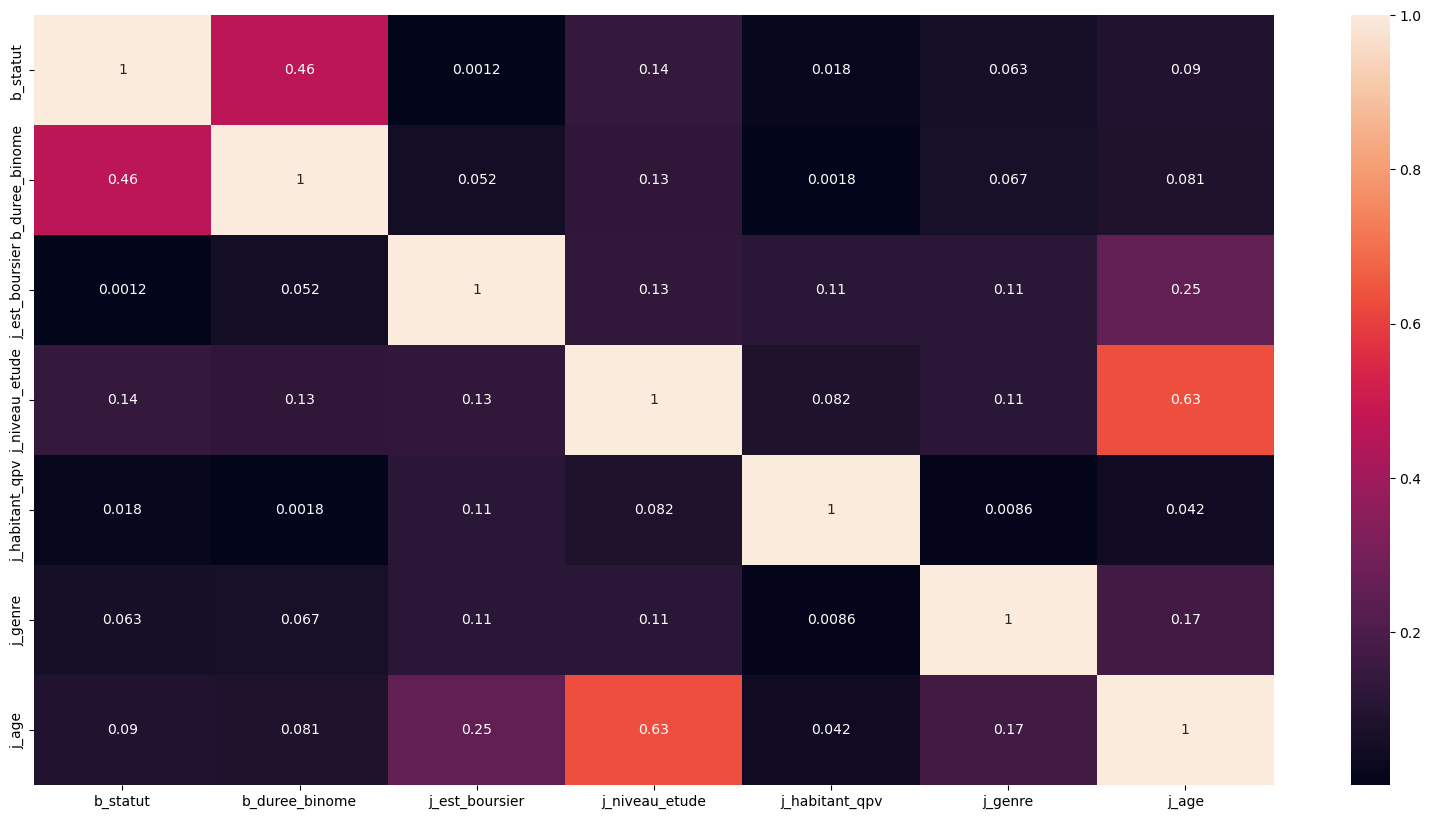

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.heatmap(data_1.corr().abs(),  annot=True)